In [26]:
# import the modules
from theano import *
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("welcome to NN using Theano")

welcome to NN using Theano


In [4]:
# use Theano primitive data type
# and define the function
x = T.dscalar('x')
y = T.dscalar('y')
z = x + y

# define the function
# inputs[x,y]
# output z
f = function([x,y], z)

In [5]:
# invoke the function
f(2.0, 3.5)

array(5.5)

In [6]:
type(x)

theano.tensor.var.TensorVariable

In [7]:
#pretty print the function z
print(pp(z))

(x + y)


In [8]:
## Add two matrics
a = T.dmatrix('x')
b = T.dmatrix('y')
c = a + b

m_add = function([a,b], c)

In [10]:
#invoke m_add
m_add([[1, 2], [3,4]], [[10, 11],[13,14]])

array([[ 11.,  13.],
       [ 16.,  18.]])

In [12]:
# example for vector
x = T.vector()
y = T.vector()
out = x ** 2 + y ** 2 + 2 * x * y

vect_modify = function([x,y], out)

In [14]:
vect_modify([1,2], [3,4])

array([ 16.,  36.])

In [34]:
# Let's try sigmoid
# input vector
v = T.vector()
out = 1 / ( 1 + T.exp(-v))  # sigmoid

sigmoid = function([v], out)

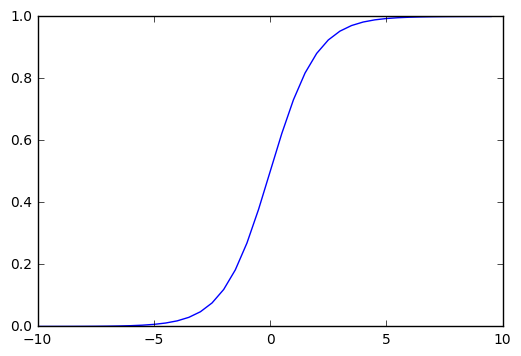

In [41]:
# generate seq of numbers from -10 to 10
in_vect = np.arange(-10, 10, 0.5)
#print(in_vect)
type(in_vect)
sig_vect = sigmoid(in_vect)
#print(sig_vect)
# do scatter plot
plt.plot(in_vect, np.array(sig_vect))

# display the plot
plt.show()

In [37]:
type(in_vect)
sig_vect = sigmoid(in_vect)
print(sig_vect)

[  4.53978687e-05   7.48462275e-05   1.23394576e-04   2.03426978e-04
   3.35350130e-04   5.52778637e-04   9.11051194e-04   1.50118226e-03
   2.47262316e-03   4.07013772e-03   6.69285092e-03   1.09869426e-02
   1.79862100e-02   2.93122308e-02   4.74258732e-02   7.58581800e-02
   1.19202922e-01   1.82425524e-01   2.68941421e-01   3.77540669e-01
   5.00000000e-01   6.22459331e-01   7.31058579e-01   8.17574476e-01
   8.80797078e-01   9.24141820e-01   9.52574127e-01   9.70687769e-01
   9.82013790e-01   9.89013057e-01   9.93307149e-01   9.95929862e-01
   9.97527377e-01   9.98498818e-01   9.99088949e-01   9.99447221e-01
   9.99664650e-01   9.99796573e-01   9.99876605e-01   9.99925154e-01]


In [43]:
## function can return more than value
# compute matrix diff, abs diff and diff squared

#define two matrices
a, b = T.dmatrices('a', 'b')
diff = a - b
abs_diff = abs(a-b)
# element wise squared
diff_squared = diff ** 2
[]
mat = function([a,b], [diff, abs_diff, diff_squared])

In [48]:
mat1 = np.matrix([[1,2], [3,4]])
mat2 = np.matrix([[10,11], [12,13]])

df, abs_df, df_square = mat(mat1,mat2)
print(df)
print(abs_df)
print(df_square)

[[-9. -9.]
 [-9. -9.]]
[[ 9.  9.]
 [ 9.  9.]]
[[ 81.  81.]
 [ 81.  81.]]


In [49]:
## Computing Derivatives using Theano
## T.grad(y,x)  provides dy/dx

x = T.dscalar('x')
y = x**2  # y = x squaured
gy = T.grad(y,x)  # dy / dx = 2.x
derivative = function([x], gy)

In [50]:
# find derivative of x squared is 2x.
derivative(4) 

array(8.0)

In [63]:
## we can calculate the first order derivatives of a matrix (Jacobian).
## Also, we can calculate the second order derivatives (Hessian matrix)

## L(left) & R(ight) operators can be used to multiply the vector or scalar
## with the matrices . Ex; vect * dy /dx matrix or dy/dx matrix * vect

In [74]:

from theano.ifelse import ifelse

## Modeling single nueron
## Logical AND functionality
## Inputs: 2 binary inputs + bias
## output: AND functionality

#define the variables
x = T.vector('x')  # inputs
w = T.vector('w')  # weights
b = T.scalar('b')  # bias

#compute out = x*w +b
z = T.dot(x,w)+b

#convert them interms of 0 & 1
out = ifelse(T.lt(z,0), 0, 1)

#define the neuron
neuron = function([x,w,b], [z, out])

In [78]:
## test the neuron
x = np.array([[0,0], [0,1], [1,0], [1,1]])
w = [1,1]  #initial weights
b = -1.5 #bias

#iterate thru each input
for i in range(len(x)):
   t = x[i]
   #print(t)
   raw_out, output = neuron(t,w,b)
   print 'The output for x1=%d AND x2=%d is %d and raw_output %f' %(t[0], t[1], output, raw_out)

The output for x1=0 AND x2=0 is 0 and raw_output -1.500000
The output for x1=0 AND x2=1 is 0 and raw_output -0.500000
The output for x1=1 AND x2=0 is 0 and raw_output -0.500000
The output for x1=1 AND x2=1 is 1 and raw_output 0.500000
